<a href="https://colab.research.google.com/github/eduardoguimaraes90/Analise_Exploratoria_Dados_Varejo/blob/main/Analise_Exploratoria_Python_Area_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados em Linguagem Python para a Área de Varejo

In [1]:
# Importa os pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

**Carga dos dados**

In [2]:
# Carrega o dataset
df_dsa = pd.read_csv('/content/dataset.csv')

In [3]:
# Shape - indica a quantidade de linhas e colunas do dataset
df_dsa.shape

(9700, 11)

In [4]:
# Amostra dos dados
df_dsa.head() # retorna as 5 primeiras linhas do dataset

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
# Amostra dos dados
df_dsa.tail() # retorna a últimas 5 linhas do dataset

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


**Análise Exploratória Inicial**

A análise exploratória inicial é crucial para entender a estrutura, padrões e anomalias dos dados, garantindo qualidade e orientando decisões no processo analítico. Ela permite identificar tendências, inconsistências e insights iniciais que guiam as etapas seguintes.

In [6]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
# Verificando o tipo de dados de cada coluna
df_dsa.dtypes

,0
ID_Pedido,object
Data_Pedido,object
ID_Cliente,object
Segmento,object
Pais,object
Cidade,object
Estado,object
ID_Produto,object
Categoria,object
SubCategoria,object


In [8]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

,Valor_Venda
count,9700.000000
mean,230.469892
std,627.504252
min,0.444000
25%,17.248000
50%,54.272000
75%,209.932500
max,22638.480000


In [9]:
# Verificando se há regitros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
# Verificando se há valores ausentes
df_dsa.isnull().sum()

,0
ID_Pedido,0
Data_Pedido,0
ID_Cliente,0
Segmento,0
Pais,0
Cidade,0
Estado,0
ID_Produto,0
Categoria,0
SubCategoria,0


**Pergunta de Negócio 1**

Qual cidade com maior valor de venda de produtos da categoria 'Office Supplies'?

In [11]:
# Filtra apenas os dados da categoria "Office Supplies"
office_supplies = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

# Agrupa por cidades e soma as vendas
vendas_cidade = office_supplies.groupby('Cidade')['Valor_Venda'].sum()

# Encontra a cidade com o maior valor de venda
cidade_maior_venda = vendas_cidade.idxmax()
maior_valor_venda = vendas_cidade.max()

print(f"A cidade com o maior valor de venda de produtos da categoria 'Office Supllies' é {cidade_maior_venda} com o valor de ${maior_valor_venda}.")

A cidade com o maior valor de venda de produtos da categoria 'Office Supllies' é New York City com o valor de $68362.814.


**Pergunta de Negócio 2**

Qual o total de vendas por data do pedido?

Demonstre o resultado através de um gráfico de barras.


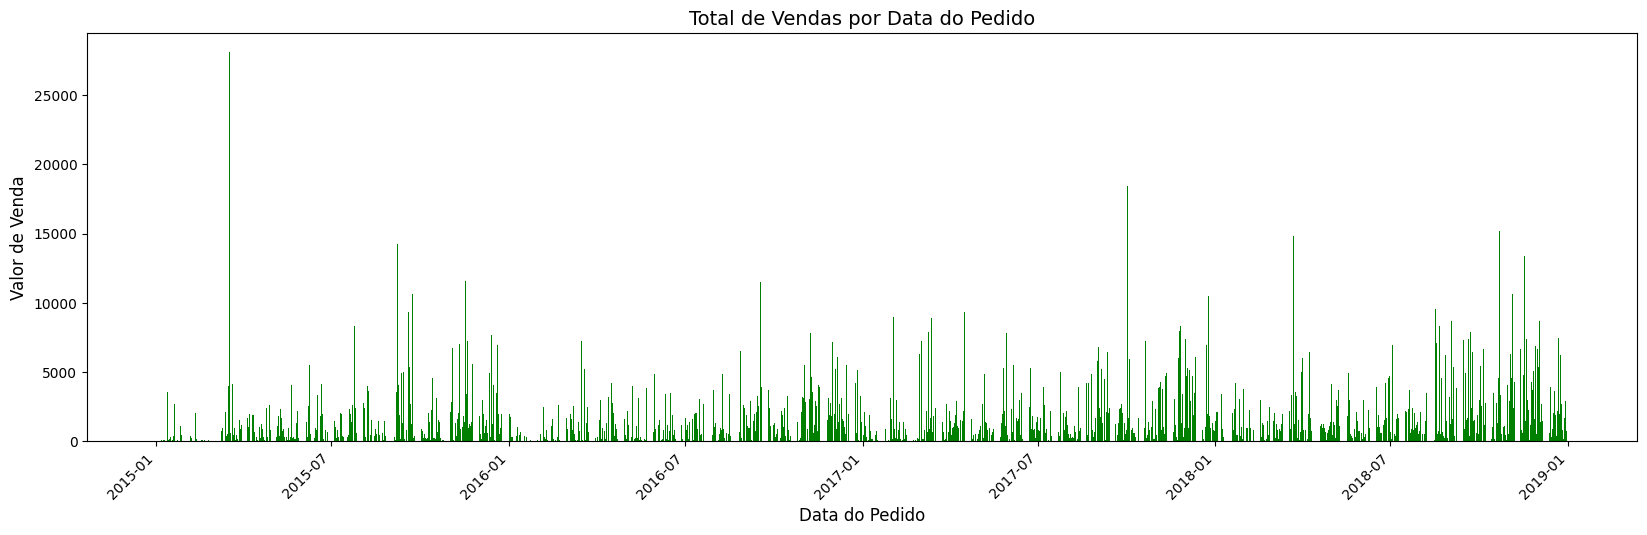

In [12]:
# Converte 'Data_Pedido' para datetime
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], format='%d/%m/%Y', errors='coerce')

# Agrupa por data do pedido e soma os valores de vendas
vendas_por_data = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

# Converte o resultado para DataFrame e reseta o índice
tabela_vendas = vendas_por_data.reset_index()

# Plota o gráfico de barras
plt.figure(figsize=(20, 6))
plt.bar(tabela_vendas['Data_Pedido'], tabela_vendas['Valor_Venda'], color = 'green')

# Define o formato dos rótulos no eixo x para dia/mês/ano
formatted_dates = tabela_vendas['Data_Pedido'].dt.strftime('%d/%m/%Y')

# Ajusta o espaçamento dos rótulos para evitar sobreposição
plt.gcf().autofmt_xdate(rotation=45)

# Adiciona títulos e rótulos
plt.title('Total de Vendas por Data do Pedido', fontsize = 14)
plt.xlabel('Data do Pedido', fontsize = 12)
plt.ylabel('Valor de Venda', fontsize = 12)

# Exibe o gráfico
plt.show()

**Pergunta de Negócio 3**

Qual o total de vendas por estado?

Demonstre o resultado através de um gráfico de barras.

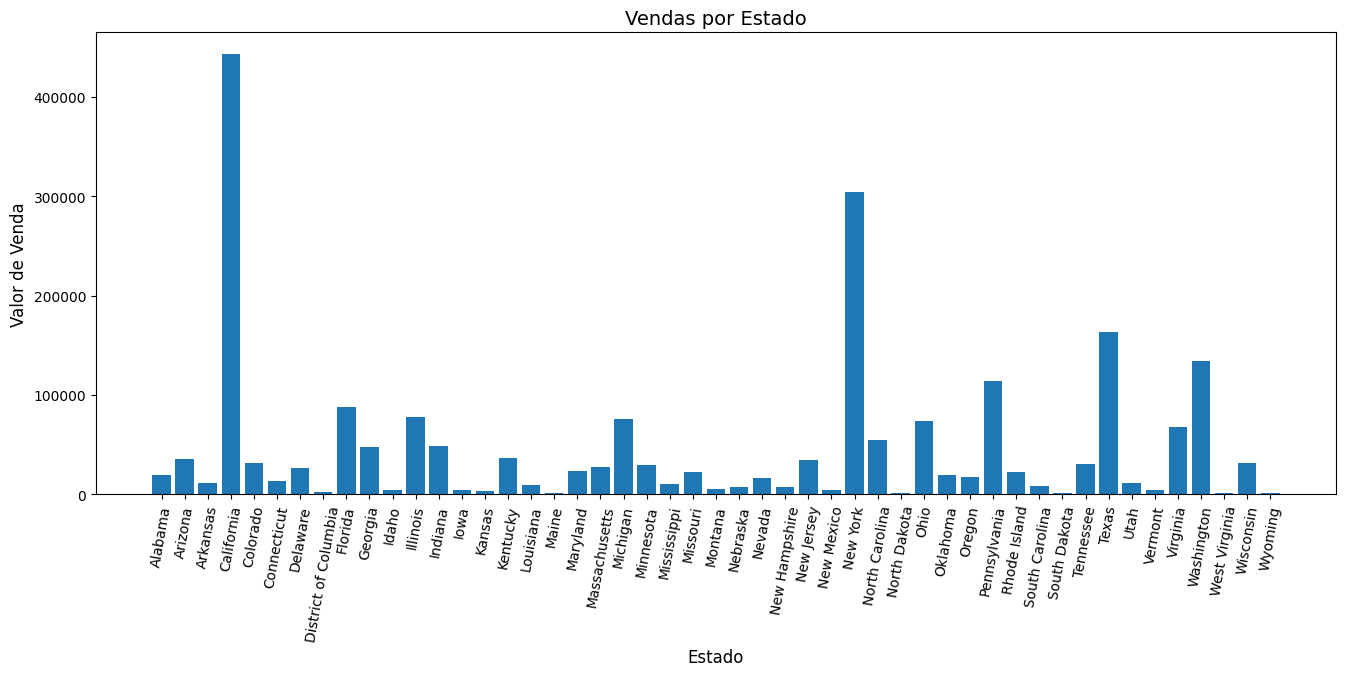

In [13]:
# Agrupa por estado, soma os valores de vendas e reseta o índice
vendas_por_estado = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

# Plota o gráfico de barras
plt.figure(figsize=(16, 6))
plt.bar(vendas_por_estado['Estado'], vendas_por_estado['Valor_Venda'])
plt.xticks(rotation = 80)

# Adiciona títulos e rótulos
plt.title('Vendas por Estado', fontsize = 14)
plt.xlabel('Estado', fontsize = 12)
plt.ylabel('Valor de Venda', fontsize = 12)

# Exibe o gráfico
plt.show()

**Pergunta de Negócio 4**

Quais são as 10 cidades com maior total de vendas?

Demonstre o resultado através de um gráfico de barras.

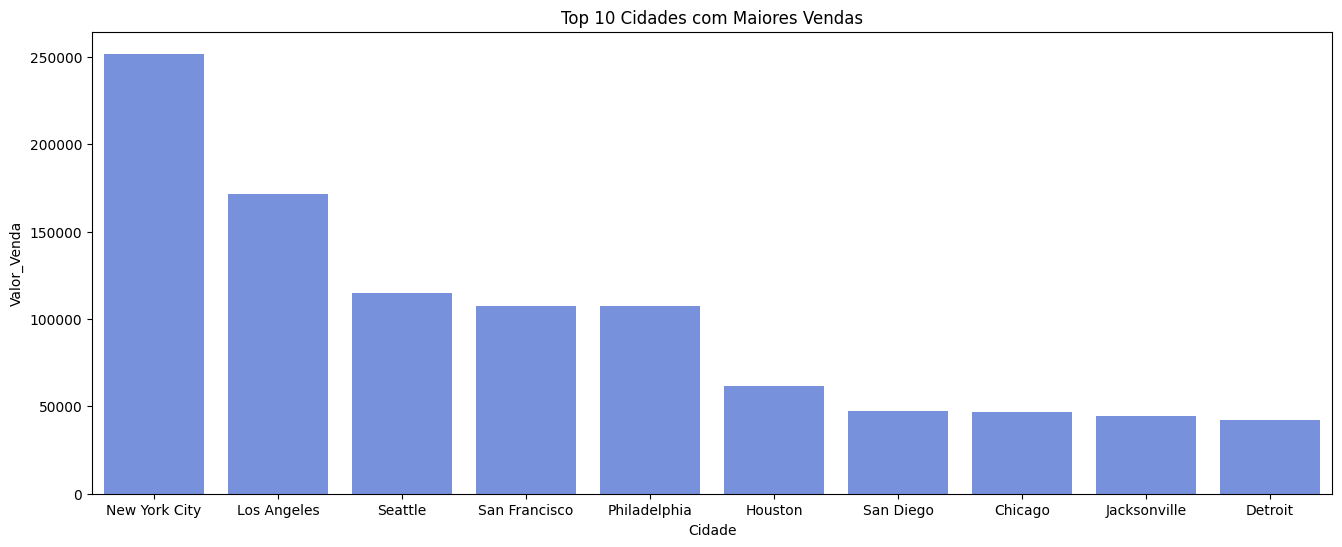

In [14]:
# Agrupa por cidade, soma os valores de vendas, reseta o índice e ordena listando somente os 10 maiores valores de vendas
cidades_maiores_vendas = df_dsa.groupby('Cidade')['Valor_Venda'] \
                          .sum().reset_index() \
                          .sort_values(by = 'Valor_Venda', ascending = False) \
                          .head(10)

# Plota o gráfico de barras
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = cidades_maiores_vendas,
            y = 'Valor_Venda',
            x = 'Cidade').set(title = 'Top 10 Cidades com Maiores Vendas')

# Exibe o gráfico
plt.show()

**Pergunta de Negócio 5**

Qual segmento teve o maior total de vendas?

Demonstre o resultado através de um gráfico de pizza.

O segmento com maior valor de vendas é 'Consumer' com o valor de $1133834.33. 



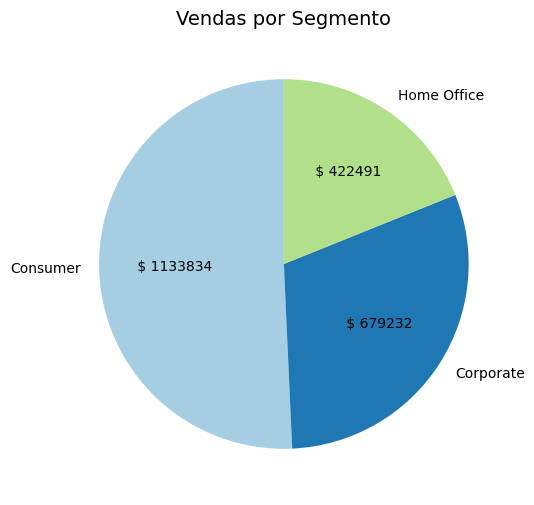

In [15]:
# Função para converter os dados em valor absoluto
def autopct_format(values):
  def format_pct(pct):
    total = sum(values)
    absolute = int(round(pct * total / 100))
    return ' $ {v:d}'.format(v = absolute)
  return format_pct

# Agrupa por segmento e soma os valores de vendas
vendas_por_segmento = df_dsa.groupby('Segmento')['Valor_Venda'].sum()

# Identifica o segmento com maior total de vendas
segmento_max = vendas_por_segmento.idxmax()
valor_max = vendas_por_segmento.max()
print(f"O segmento com maior valor de vendas é '{segmento_max}' com o valor de ${valor_max:.2f}. \n")

# Plota o gráfico de pizza
plt.figure(figsize = (15, 6))
plt.pie(vendas_por_segmento,
        labels = vendas_por_segmento.index,
        autopct = autopct_format(vendas_por_segmento),
        startangle = 90,
        colors = plt.cm.Paired.colors)
plt.title('Vendas por Segmento', fontsize = 14)

# Exibe o gráfico
plt.show()

**Pergunta de Negócio 6**

Qual o total de vendas por segmento e por ano?

In [16]:
# Converte 'Data_Pedido' para datetime
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'])

# Extrai o ano da data
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year

# Agrupa por ano e segmento e calcula o total de vendas
vendas_por_segmento_ano = df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

# Renomeia as colunas para clareza
vendas_por_segmento_ano.columns = ['Ano', 'Segmento', 'Total_Vendas']

# Exibe o resultado
print(vendas_por_segmento_ano)

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64


**Pergunta de Negócio 7**

Os gestores da empresa estão considerando conceder diferentes faixas de desconto e gostariam de fazer uma simulação com base na regra abaixo:


*   Se o valor de venda for maior do que 1.000 recebe 15% de desconto
*   Se o valor de venda for maior do que 1.000 recebe 10% de desconto

Quantas vendas receberiam 15% de desconto?

In [17]:
# Cria uma nova coluna aplicando a regra de desconto usando uma função lambda
df_dsa['Desconto'] = df_dsa['Valor_Venda'].apply(
    lambda x: 0.15 if x > 1000 else 0.10)

# Filtra as vendas que receberiam 15% de desconto
vendas_15_desconto = df_dsa[df_dsa['Desconto'] == 0.15]

# Conta as vendas que recebem 15% de desconto
qtde_vendas_15_desconto = vendas_15_desconto.shape[0]

# Exibe o resultado
print(f'Quantidade de vendas que recebem 15% de desconto: {qtde_vendas_15_desconto}.')

Quantidade de vendas que recebem 15% de desconto: 457.


Pergunta de Negócio 8

Considere que a empresa decida conceder o desconto de 15% do item anterior. Qual seria a média do valor de venda antes e depois do desconto?

In [18]:
# Cria uma coluna com o valor de venda com desconto (15%) - somente para as vendas acima de $ 1000,00
df_dsa['Valor_Venda_Desconto'] = df_dsa['Valor_Venda'].apply(
    lambda x: x * 0.85 if x > 1000 else x)

# Filtra apenas as vendas que receberam 15% de desconto
vendas_com_desconto = df_dsa[df_dsa['Valor_Venda'] > 1000]

# Calcula as médias
media_antes_desconto = vendas_com_desconto['Valor_Venda'].mean()
media_apos_desconto = vendas_com_desconto['Valor_Venda_Desconto'].mean()

# Exibe o resultado com duas casas decimais
print(f'Média do valor de venda antes do desconto: ${media_antes_desconto:.2f}')
print(f'Média do valor de venda após o desconto: ${media_apos_desconto:.2f}')

Média do valor de venda antes do desconto: $2116.81
Média do valor de venda após o desconto: $1799.29


**Pergunta de Negócio 9**

Qual a média de vendas por segmento, por ano e por mês?

Demonstre o resultado através de um gráfico de linha.

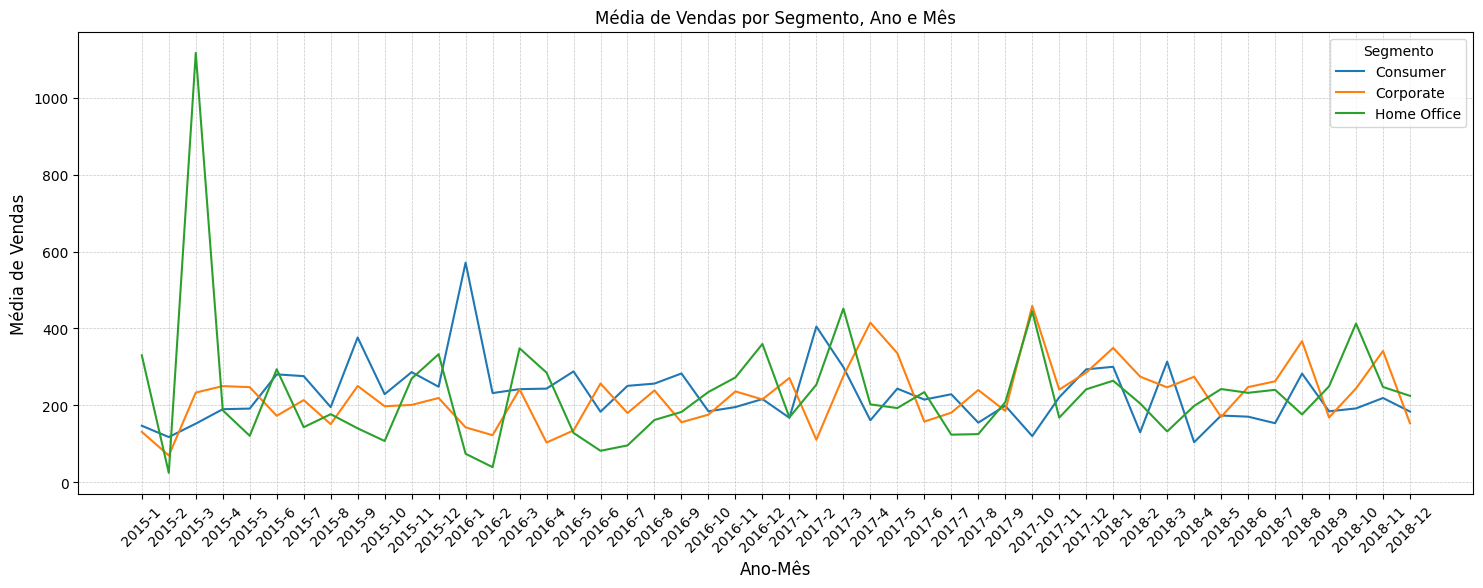

In [19]:
# Adiciona coluna de mês ao dataframe. Obs.: a coluna de ano foi adicionada na Pergunta de Negócio 6.
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month

# Agrupa por segmento, ano e mês e calcula a média de vendas
media_vendas = (df_dsa.groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].mean().reset_index())

# Adiciona uma coluna 'Ano-Mês' para facilitar a exibição no eixo X
media_vendas['Ano-Mês'] = media_vendas['Ano'].astype(str) + '-' + media_vendas['Mes'].astype(str)

# Plota o gráfico com todos os anos e segmentos
plt.figure(figsize = (18, 6))
sns.lineplot(data = media_vendas,
             x = 'Ano-Mês',
             y = 'Valor_Venda',
             hue = 'Segmento',
             palette = 'tab10')

# Adiciona títulos e rótulos
plt.title('Média de Vendas por Segmento, Ano e Mês')
plt.xlabel('Ano-Mês', fontsize = 12)
plt.ylabel('Média de Vendas', fontsize = 12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(rotation = 45)

# Exibe o gráfico
plt.show()

**Pergunta de Negócio 10**

Qual a média de vendas por categoria e subcategoria, considerando somente as top 12 subcategorias?

Demonstre tudo através de um único gráfico.

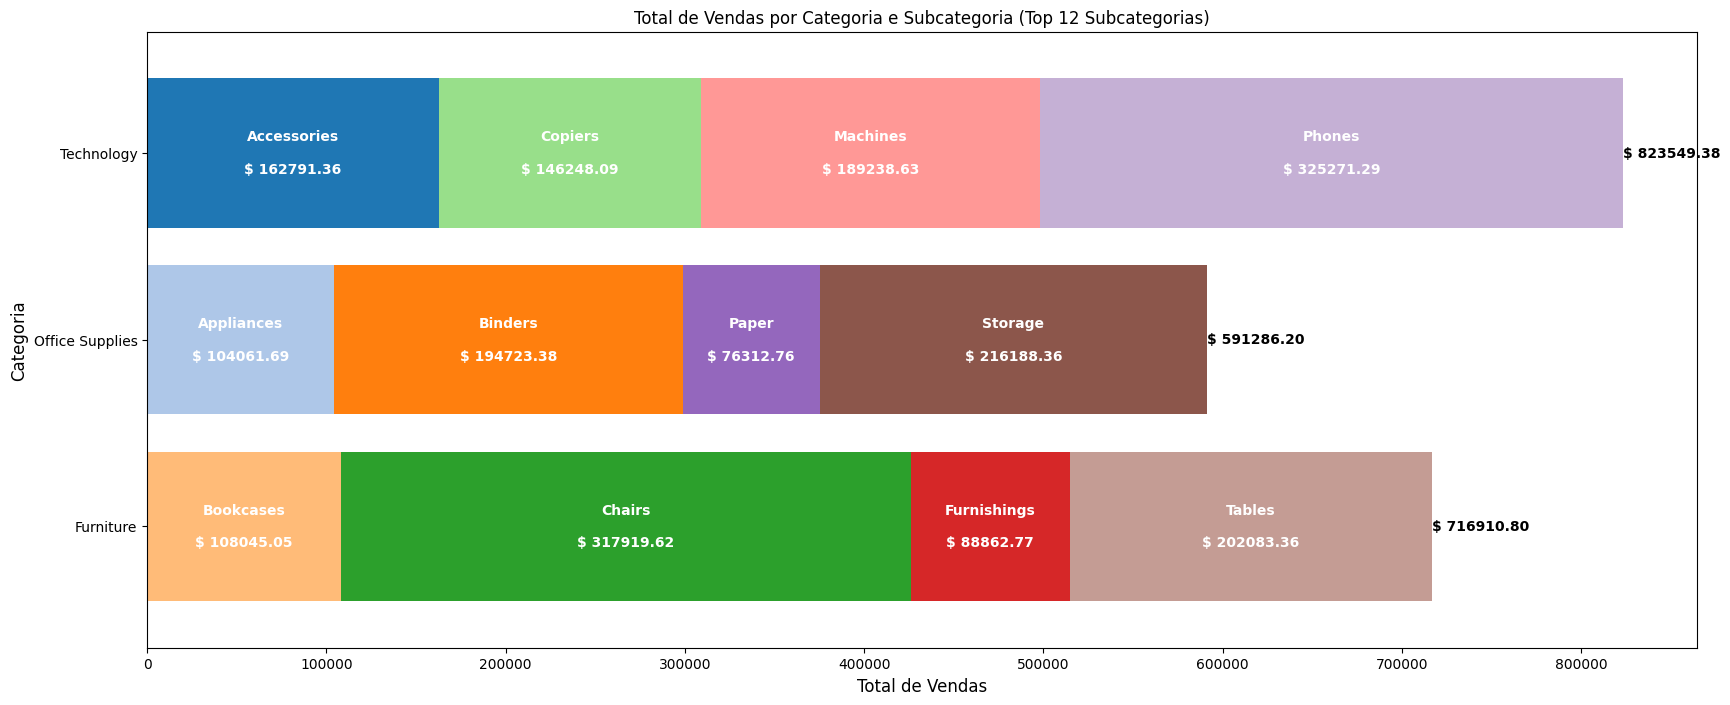

In [48]:
# Calcula o total de vendas por categoria e subcategoria
total_vendas_cat_subcat = df_dsa.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().reset_index()

# Calcula o total de vendas por subcategoria e ordena para encontrar o "top 12"
top_12_subcat = df_dsa.groupby(['SubCategoria'])['Valor_Venda'].sum().nlargest(12).index

# Filtra as "top 12" subcategorias
total_vendas_top12 = total_vendas_cat_subcat[total_vendas_cat_subcat['SubCategoria'].isin(top_12_subcat)]

# Cria a tabela pivoteada para utilizar o gráfico de barras empilhadas
total_vendas_pivot = total_vendas_top12.pivot(index = 'Categoria', columns = 'SubCategoria', values = 'Valor_Venda').fillna(0) # fillna preenche os valores ausentes com zero

# Calcula o total de vendas por categoria
total_vendas_cat = total_vendas_pivot.sum(axis = 1)

# Plota o gráfico dividindo as barras por categoria e subcategoria
fig, ax = plt.subplots(figsize=(20, 8))
colors = plt.cm.tab20.colors
bars = total_vendas_pivot.plot(kind = 'barh', stacked=True, ax=ax, color=colors, width=0.8, legend = False)

# Adiciona rótulos às barras
for i, categoria in enumerate(total_vendas_pivot.index):
    cumulative = 0
    for j, subcategoria in enumerate(total_vendas_pivot.columns):
        value = total_vendas_pivot.loc[categoria, subcategoria]
        if value > 0:
            # Adiciona o rótulo dentro da barra com o nome da subcategoria e o valor
            ax.text(cumulative + value / 2, i, f'{subcategoria}\n\n$ {value:.2f}',
                    va='center', ha='center', fontsize=10, color='white', fontweight='bold')
            cumulative += value
    # Adiciona o total de vendas por categoria no final de cada barra
    ax.text(cumulative + 0.5, i, f'$ {total_vendas_cat[categoria]:.2f}',
            va='center', ha='left', fontsize=10, color='black', fontweight='bold')

# Adiciona títulos e rótulos
plt.title('Total de Vendas por Categoria e Subcategoria (Top 12 Subcategorias)')
plt.ylabel('Categoria', fontsize = 12)
plt.xlabel('Total de Vendas', fontsize = 12)

# Exibe o gráfico
plt.show()